In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import category_encoders as ce
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [ ]:
#import train data - convert exel to csv

train = pd.read_excel(r'/content/train.xlsx')
train.to_csv(r'/content/drive/MyDrive/train.csv', index = None, header=True)
train.head()

test = pd.read_excel(r'/content/test.xlsx')
test.to_csv(r'/content/drive/MyDrive/test.csv', index = None, header=True)

In [ ]:
# Check to see if there are any missing values in our data set
train.isnull().any()

ID                                        False
GenderSelect                               True
Country                                    True
Age                                        True
EmploymentStatus                          False
CodeWriter                                False
CurrentJobTitleSelect                      True
TitleFit                                   True
CurrentEmployerType                        True
MLToolNextYearSelect                       True
MLMethodNextYearSelect                     True
LanguageRecommendationSelect               True
LearningPlatformUsefulnessBlogs            True
LearningPlatformUsefulnessKaggle           True
LearningPlatformUsefulnessCourses          True
LearningPlatformUsefulnessProjects         True
LearningPlatformUsefulnessSO               True
LearningPlatformUsefulnessTextbook         True
LearningPlatformUsefulnessYouTube          True
DataScienceIdentitySelect                  True
FormalEducation                         

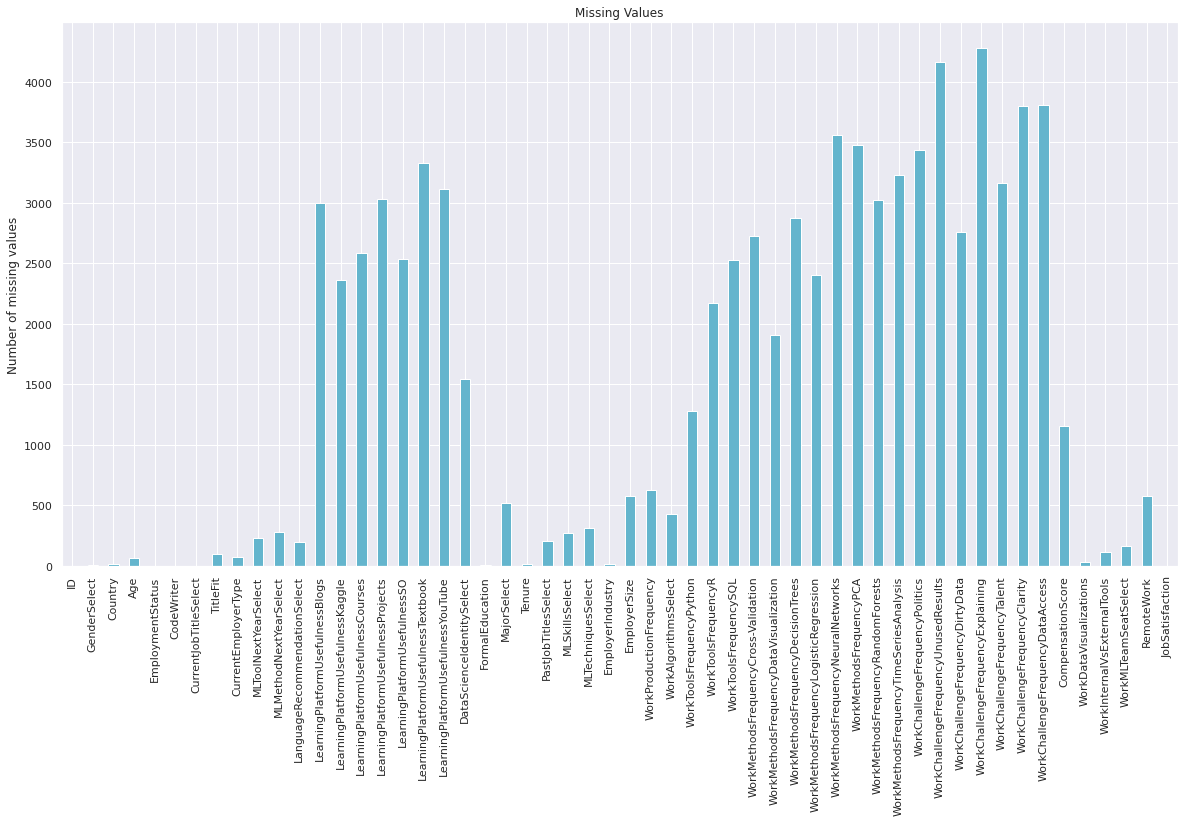

In [ ]:

sns.set(rc={'figure.figsize':(20,10)},font_scale=1)
pd.isnull(train).sum().plot(kind='bar',color='c')
plt.ylabel('Number of missing values')
plt.title('Missing Values');

In [ ]:
droppedcols = []
droppedcols = train.isnull().mean() < .6

train = train.loc[:, droppedcols]
test =  test.loc[:, droppedcols]


# replace nan values with mode for test and train
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

In [ ]:
# Check to see if there are any missing values in our data set
train.isnull().any()

ID                                        False
GenderSelect                              False
Country                                   False
Age                                       False
EmploymentStatus                          False
CodeWriter                                False
CurrentJobTitleSelect                     False
TitleFit                                  False
CurrentEmployerType                       False
MLToolNextYearSelect                      False
MLMethodNextYearSelect                    False
LanguageRecommendationSelect              False
LearningPlatformUsefulnessBlogs           False
LearningPlatformUsefulnessKaggle          False
LearningPlatformUsefulnessCourses         False
LearningPlatformUsefulnessProjects        False
LearningPlatformUsefulnessSO              False
LearningPlatformUsefulnessYouTube         False
DataScienceIdentitySelect                 False
FormalEducation                           False
MajorSelect                             

# Distribution Plots

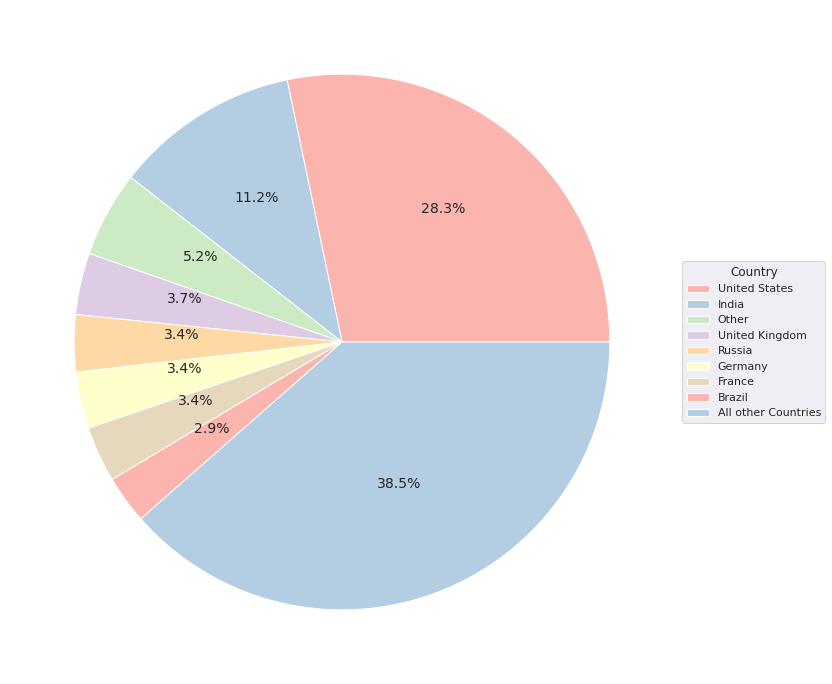

In [ ]:

import matplotlib.pyplot as plt
import squarify 
import matplotlib.pyplot as plt
import squarify 


sf = train.Country.value_counts()
Country  = pd.DataFrame({'Country':sf.index, 'number':sf.values})

#the top 5
Country2 = Country[:8].copy()

#others
new_row = pd.DataFrame(data = {
    'Country' : ['All other Countries'],
    'number' : [Country['number'][8:].sum()]
})

#combining top 5 with others
Country2 = pd.concat([Country2, new_row])




fig, ax = plt.subplots(figsize=(12, 38), subplot_kw=dict(aspect="equal"))


names=[ var for var in Country2['Country'] ]
size=[ var for var  in Country2['number'] ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size), colors= Pastel1_7.hex_colors)

ax.legend(wedges, names,
          title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)


plt.show()

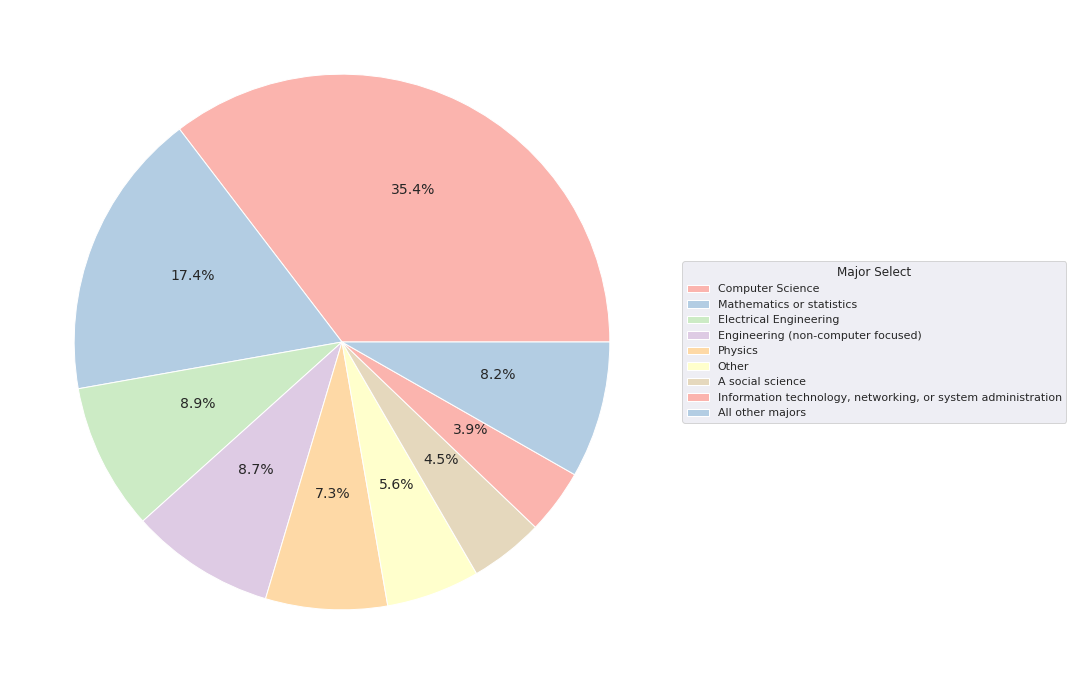

In [ ]:
sf = train.MajorSelect.value_counts()
major  = pd.DataFrame({'MajorSelect':sf.index, 'number':sf.values})

#the top 5
major2 = major[:8].copy()

#others
new_row = pd.DataFrame(data = {
    'MajorSelect' : ['All other majors'],
    'number' : [major['number'][8:].sum()]
})

#combining top 5 with others
major2 = pd.concat([major2, new_row])




fig, ax = plt.subplots(figsize=(12, 38), subplot_kw=dict(aspect="equal"))


names=[ var for var in major2['MajorSelect'] ]
size=[ var for var  in major2['number'] ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size), colors= Pastel1_7.hex_colors)

ax.legend(wedges, names,
          title="Major Select",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)


plt.show()

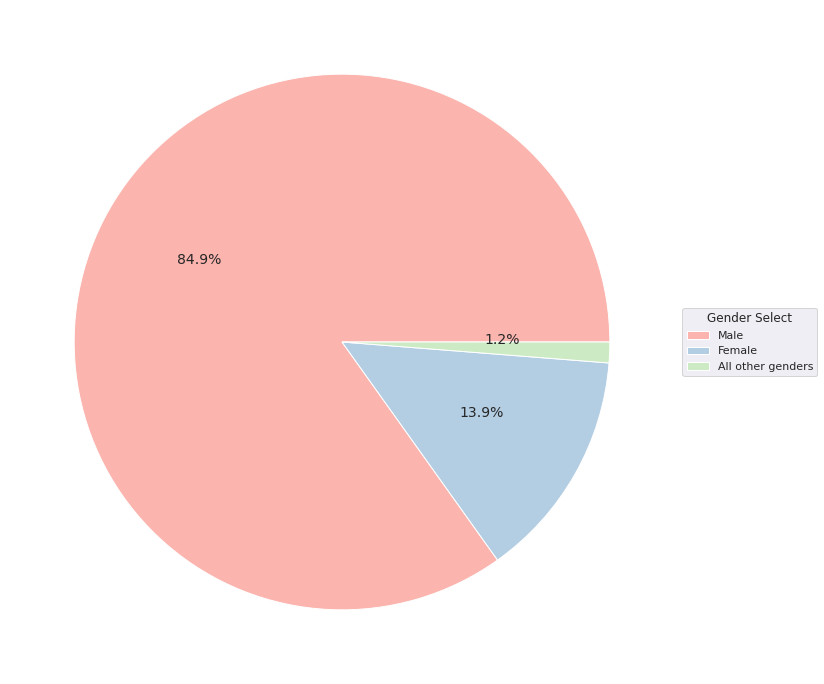

In [ ]:
sf = train.GenderSelect.value_counts()
GenderSelect  = pd.DataFrame({'GenderSelect':sf.index, 'number':sf.values})
fig, ax = plt.subplots(figsize=(12, 38), subplot_kw=dict(aspect="equal"))


#the top 5
GenderSelect2 = GenderSelect[:2].copy()

#others
new_row = pd.DataFrame(data = {
    'GenderSelect' : ['All other genders'],
    'number' : [GenderSelect['number'][2:].sum()]
})

#combining top 5 with others
GenderSelect2 = pd.concat([GenderSelect2, new_row])

names=[ var for var in GenderSelect2['GenderSelect'] ]
size=[ var for var  in GenderSelect2['number'] ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size), colors= Pastel1_7.hex_colors)

ax.legend(wedges, names,
          title="Gender Select",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)


plt.show()

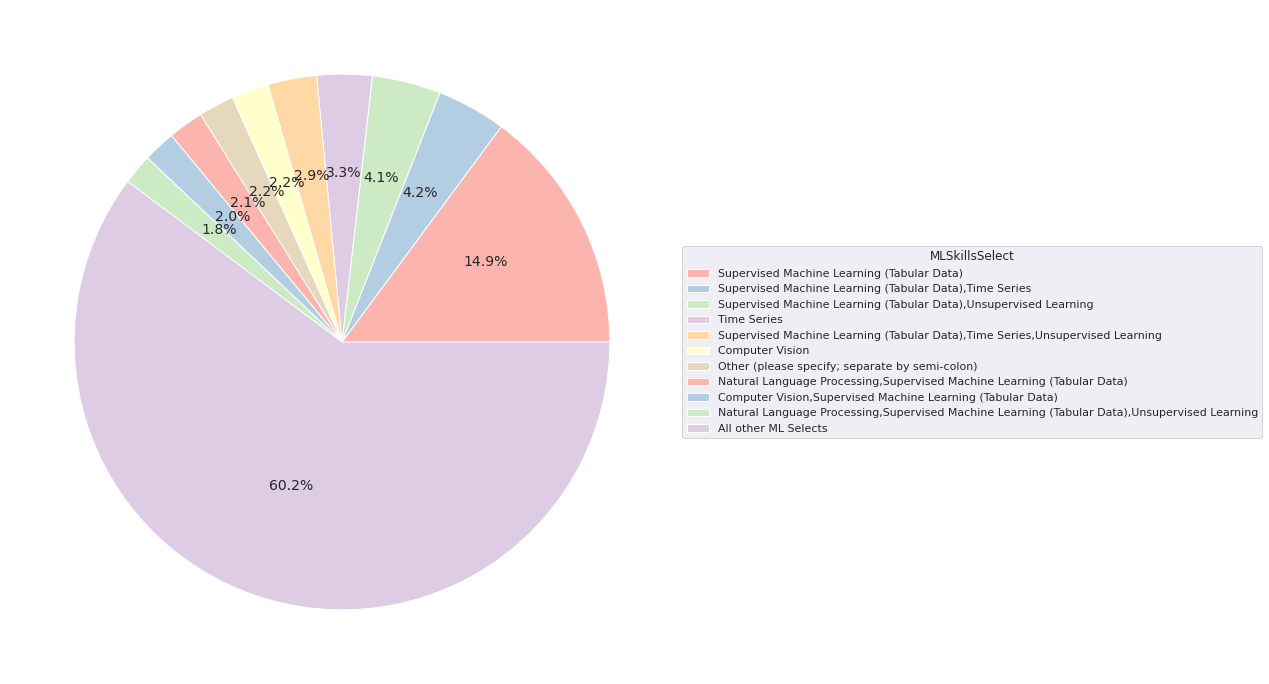

In [ ]:
sf = train.MLSkillsSelect.value_counts()
MLSkillsSelect  = pd.DataFrame({'MLSkillsSelect':sf.index, 'number':sf.values})

fig, ax = plt.subplots(figsize=(12, 38), subplot_kw=dict(aspect="equal"))


#the top 5
MLSkillsSelect2 = MLSkillsSelect[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'MLSkillsSelect' : ['All other ML Selects'],
    'number' : [MLSkillsSelect['number'][10:].sum()]
})

#combining top 5 with others
MLSkillsSelect2 = pd.concat([MLSkillsSelect2, new_row])

names=[ var for var in MLSkillsSelect2['MLSkillsSelect'] ]
size=[ var for var  in MLSkillsSelect2['number'] ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)



wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size), colors= Pastel1_7.hex_colors)


ax.legend(wedges, names,
          title="MLSkillsSelect",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)


plt.show()

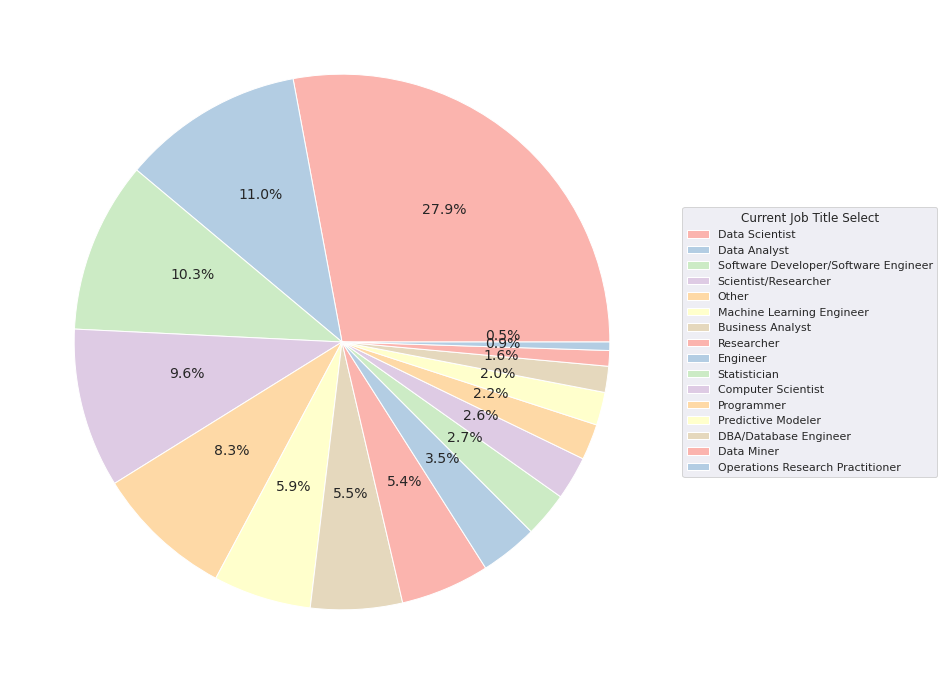

In [ ]:
fig, ax = plt.subplots(figsize=(12, 38), subplot_kw=dict(aspect="equal"))

sf = train.CurrentJobTitleSelect.value_counts()
CurrentJobTitleSelect  = pd.DataFrame({'CurrentJobTitleSelect':sf.index, 'number':sf.values})


names=[ var for var in CurrentJobTitleSelect['CurrentJobTitleSelect'] ]
size=[ var for var  in CurrentJobTitleSelect['number'] ]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n".format(pct, absolute)


wedges, texts, autotexts = ax.pie(size, autopct=lambda pct: func(pct, size), colors= Pastel1_7.hex_colors)

ax.legend(wedges, names,
          title="Current Job Title Select",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14)


plt.show()

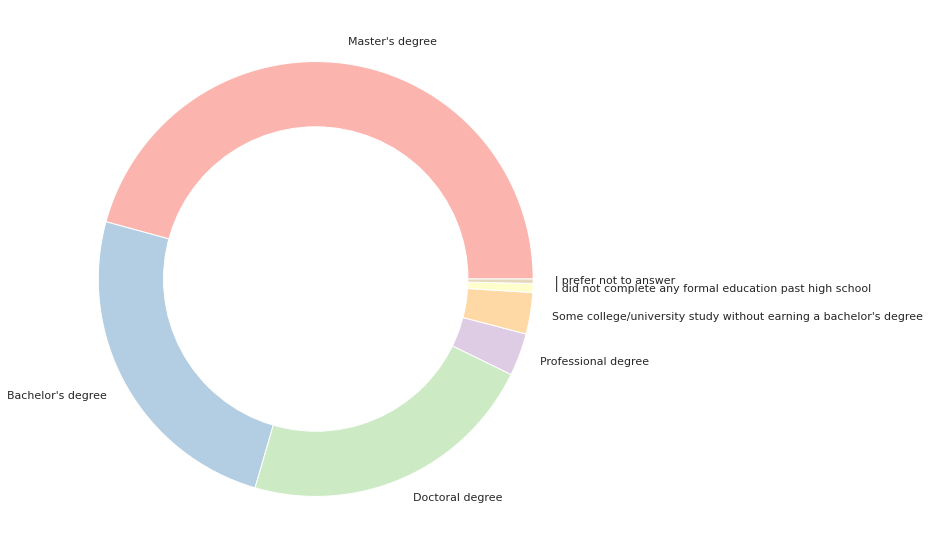

In [ ]:
sf = train.FormalEducation.value_counts()
FormalEducation  = pd.DataFrame({'FormalEducation':sf.index, 'number':sf.values})
fig = plt.figure(figsize=(14, 10)) 
names=[ var for var in FormalEducation['FormalEducation'] ]
size=[ var for var  in FormalEducation['number'] ]
 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

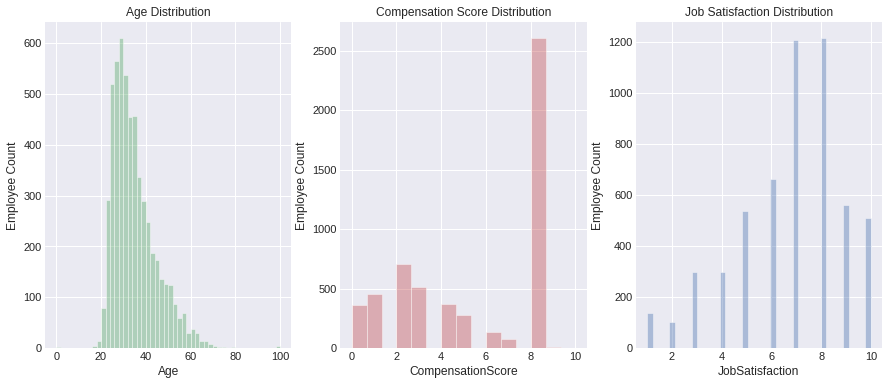

In [ ]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(train.Age, kde=False, color="g", ax=axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(train.CompensationScore, kde=False, color="r", ax=axes[1]).set_title('Compensation Score Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(train.JobSatisfaction, kde=False, color="b", ax=axes[2]).set_title('Job Satisfaction Distribution')
axes[2].set_ylabel('Employee Count')

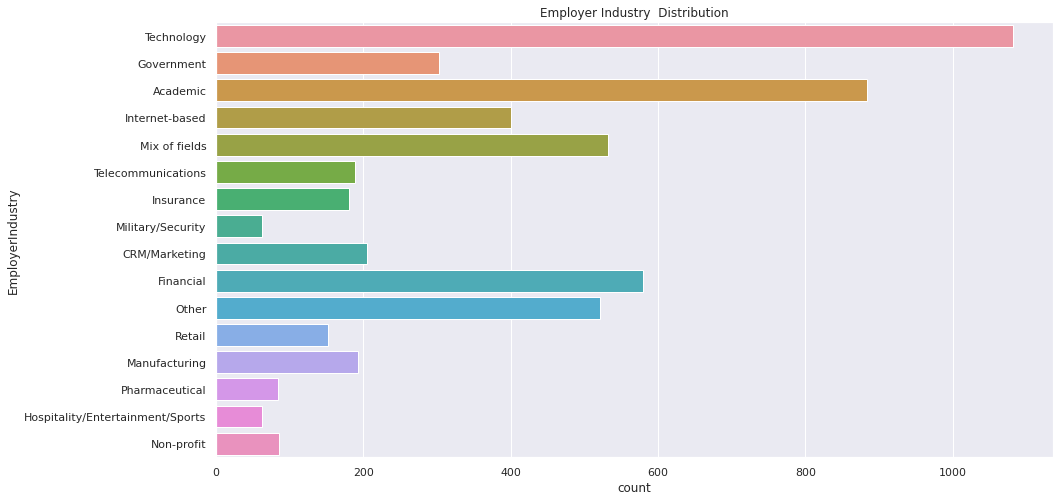

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="EmployerIndustry", data=train).set_title('Employer Industry  Distribution');

In [ ]:
sf = train.FormalEducation.value_counts()
FormalEducation  = pd.DataFrame({'FormalEducation':sf.index, 'number':sf.values})
FormalEducation               

,FormalEducation,number
0,Master's degree,2530
1,Bachelor's degree,1368
2,Doctoral degree,1231
3,Professional degree,175
4,Some college/university study without earning ...,170
5,I did not complete any formal education past h...,37
6,I prefer not to answer,18


# Corelation Graphs

Text(0.5, 1.0, 'Job Satisfaction Distribution - FormalEducation Frequency')

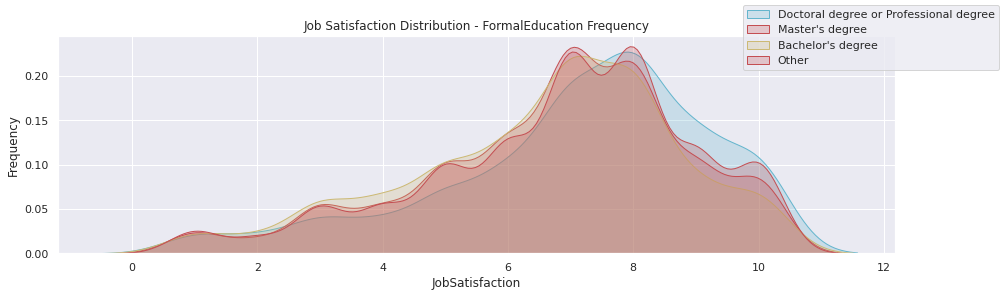

In [ ]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['FormalEducation'] == ('Doctoral degree'or "Professional degree")),'JobSatisfaction'] , color='c',shade=True )
ax=sns.kdeplot(train.loc[(train['FormalEducation'] == "Master's degree"),'JobSatisfaction'] , color='r',shade=True)
ax=sns.kdeplot(train.loc[(train['FormalEducation'] == "Bachelor's degree"),'JobSatisfaction'] , color='y',shade=True)

ax=sns.kdeplot(train.loc[(train['FormalEducation'] != ("Bachelor's degree" or"Professional degree" or "Master's degree" or "Doctoral degree"  )),'JobSatisfaction'] , color='r',shade=True)
fig.legend(labels=['Doctoral degree or Professional degree',"Master's degree","Bachelor's degree", "Other" ])



ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - FormalEducation Frequency')

Text(0.5, 1.0, 'Job Satisfaction Distribution - CompensationScore Frequency')

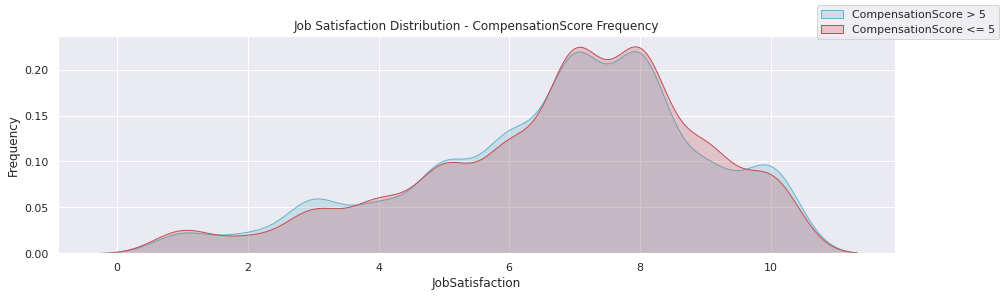

In [ ]:


fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['CompensationScore'] > 5),'JobSatisfaction'] , color='c',shade=True)
ax=sns.kdeplot(train.loc[(train['CompensationScore'] <= 5),'JobSatisfaction'] , color='r',shade=True)
fig.legend(labels=['CompensationScore > 5','CompensationScore <= 5'])

ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - CompensationScore Frequency')



Text(0.5, 1.0, 'Job Satisfaction Distribution - Age Frequency')

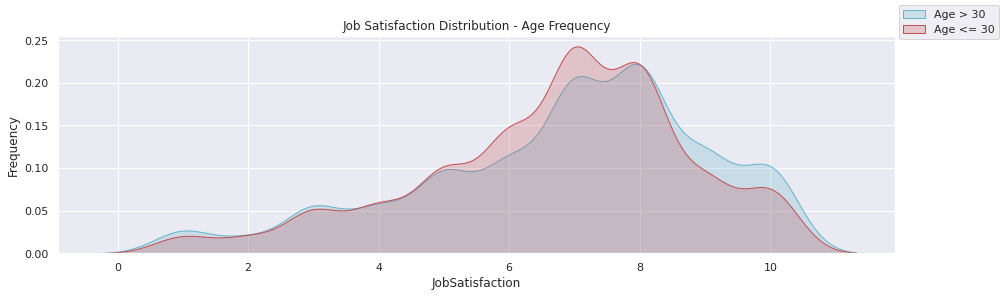

In [ ]:
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['Age'] > 30),'JobSatisfaction'] , color='c',shade=True )
ax=sns.kdeplot(train.loc[(train['Age'] <= 30),'JobSatisfaction'] , color='r',shade=True)
fig.legend(labels=['Age > 30','Age <= 30'])

ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - Age Frequency')

In [ ]:
categorical = [var for var in train.columns if train[var].dtype=='O']


print('There are {} categorical variables \n'.format(len(categorical)))
print('The categorical variables are :\n\n',categorical)

There are 42 categorical variables 

The categorical variables are :

 ['GenderSelect', 'Country', 'EmploymentStatus', 'CodeWriter', 'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType', 'MLToolNextYearSelect', 'MLMethodNextYearSelect', 'LanguageRecommendationSelect', 'LearningPlatformUsefulnessBlogs', 'LearningPlatformUsefulnessKaggle', 'LearningPlatformUsefulnessCourses', 'LearningPlatformUsefulnessProjects', 'LearningPlatformUsefulnessSO', 'LearningPlatformUsefulnessYouTube', 'DataScienceIdentitySelect', 'FormalEducation', 'MajorSelect', 'Tenure', 'PastJobTitlesSelect', 'MLSkillsSelect', 'MLTechniquesSelect', 'EmployerIndustry', 'EmployerSize', 'WorkProductionFrequency', 'WorkAlgorithmsSelect', 'WorkToolsFrequencyPython', 'WorkToolsFrequencyR', 'WorkToolsFrequencySQL', 'WorkMethodsFrequencyCross-Validation', 'WorkMethodsFrequencyDataVisualization', 'WorkMethodsFrequencyDecisionTrees', 'WorkMethodsFrequencyLogisticRegression', 'WorkMethodsFrequencyRandomForests', 'WorkMethodsFr

In [ ]:
!pip install squarify

In [ ]:
sf = train.CurrentJobTitleSelect.value_counts()
job  = pd.DataFrame({'CurrentJobTitleSelect':sf.index, 'number':sf.values})


In [ ]:
JobSatisfaction  = train.JobSatisfaction.value_counts() / len(train)
JobSatisfaction

8     0.219931
7     0.218303
6     0.119551
9     0.101284
5     0.096943
10    0.092603
3     0.054259
4     0.053898
1     0.024959
2     0.018267
Name: JobSatisfaction, dtype: float64

In [ ]:
train.describe()

,ID,Age,CompensationScore,JobSatisfaction
count,5529.00000,5529.000000,5529.000000,5529.000000
mean,2765.00000,34.382167,5.188280,6.767046
std,1596.22915,9.851351,2.981825,2.149612
min,1.00000,0.000000,0.000000,1.000000
25%,1383.00000,27.000000,2.000000,6.000000
50%,2765.00000,32.000000,6.000000,7.000000
75%,4147.00000,39.000000,8.000000,8.000000
max,5529.00000,100.000000,10.000000,10.000000


In [ ]:
# Employee distri
# Types of colors

f, ax = plt.subplots(figsize=(30,9))
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='CurrentJobTitleSelect', data=test, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

In [ ]:
for col in train:
    print( col  + " has  " + str(len(train[col].unique())) + "  labels")

ID has  5529  labels
GenderSelect has  4  labels
Country has  52  labels
Age has  68  labels
EmploymentStatus has  3  labels
CodeWriter has  1  labels
CurrentJobTitleSelect has  16  labels
TitleFit has  3  labels
CurrentEmployerType has  70  labels
MLToolNextYearSelect has  50  labels
MLMethodNextYearSelect has  25  labels
LanguageRecommendationSelect has  13  labels
LearningPlatformUsefulnessBlogs has  3  labels
LearningPlatformUsefulnessKaggle has  3  labels
LearningPlatformUsefulnessCourses has  3  labels
LearningPlatformUsefulnessProjects has  3  labels
LearningPlatformUsefulnessSO has  3  labels
LearningPlatformUsefulnessYouTube has  3  labels
DataScienceIdentitySelect has  3  labels
FormalEducation has  7  labels
MajorSelect has  15  labels
Tenure has  6  labels
PastJobTitlesSelect has  1142  labels
MLSkillsSelect has  647  labels
MLTechniquesSelect has  1181  labels
EmployerIndustry has  16  labels
EmployerSize has  10  labels
WorkProductionFrequency has  6  labels
WorkAlgorithm

Since CodeWriter has  1  labels drop that column

In [ ]:
test.drop('CodeWriter', axis='columns', inplace=True)

train.drop('CodeWriter', axis='columns', inplace=True)

Text(0.5, 1.0, 'Job Satisfaction Distribution - RemoteWork Frequency')

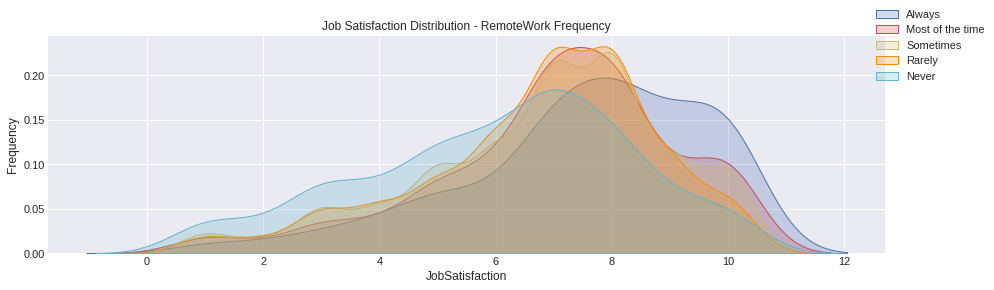

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['RemoteWork'] == 'Always'),'JobSatisfaction'] , color='b',shade=True,label='Always')
ax=sns.kdeplot(train.loc[(train['RemoteWork'] == 'Most of the time'),'JobSatisfaction'] , color='r',shade=True, label='Most of the time')
ax=sns.kdeplot(train.loc[(train['RemoteWork'] == 'Sometimes'),'JobSatisfaction'] , color='y',shade=True, label='Sometimes')
ax=sns.kdeplot(train.loc[(train['RemoteWork'] == 'Rarely'),'JobSatisfaction'] , color='darkorange',shade=True, label='Rarely')
ax=sns.kdeplot(train.loc[(train['RemoteWork'] == 'Never'),'JobSatisfaction'] , color='c',shade=True, label='Never')

fig.legend(labels=['Always','Most of the time', 'Sometimes','Rarely','Never'])

ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - RemoteWork Frequency')

Text(0.5, 1.0, 'Job Satisfaction Distribution - Employment Types')

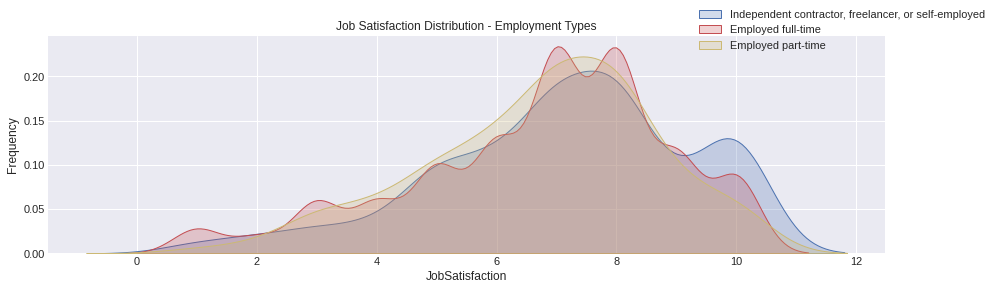

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['EmploymentStatus'] == 'Independent contractor, freelancer, or self-employed'),'JobSatisfaction'] , color='b',shade=True,label='Independent, freelancer, self-employed')
ax=sns.kdeplot(train.loc[(train['EmploymentStatus'] == 'Employed full-time'),'JobSatisfaction'] , color='r',shade=True, label='Employed full-time')
ax=sns.kdeplot(train.loc[(train['EmploymentStatus'] == 'Employed part-time'),'JobSatisfaction'] , color='y',shade=True, label='Employed part-time')

fig.legend(labels=['Independent contractor, freelancer, or self-employed','Employed full-time', 'Employed part-time'])
ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - Employment Types')

In [ ]:
train.EmployerSize.value_counts()

10,000 or more employees    1673
100 to 499 employees         841
20 to 99 employees           798
1,000 to 4,999 employees     736
500 to 999 employees         406
10 to 19 employees           314
5,000 to 9,999 employees     293
Fewer than 10 employees      291
I don't know                 140
I prefer not to answer        37
Name: EmployerSize, dtype: int64

Text(0.5, 1.0, 'Job Satisfaction Distribution - EmployerSize Frequency')

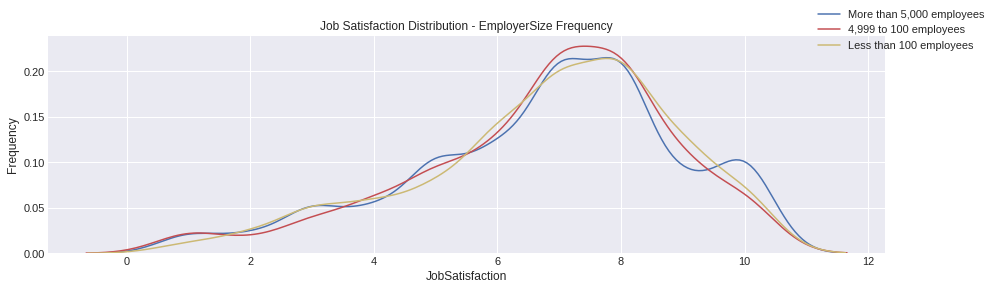

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(train.loc[(train['EmployerSize'] == ('10,000 or more employees' or'5,000 to 9,999 employees' )),'JobSatisfaction'] , color='b',shade=False)
ax=sns.kdeplot(train.loc[(train['EmployerSize'] == ('1,000 to 4,999 employees' or'500 to 999 employees' or '100 to 499 employees' )),'JobSatisfaction'] , color='r',shade=False)
ax=sns.kdeplot(train.loc[(train['EmployerSize'] == ('20 to 99 employees' or '10 to 19 employees' or 'Fewer than 10 employees')),'JobSatisfaction'] , color='y',shade=False)


fig.legend(labels=['More than 5,000 employees','4,999 to 100 employees', 'Less than 100 employees'])

ax.set(xlabel='JobSatisfaction', ylabel='Frequency')
plt.title('Job Satisfaction Distribution - EmployerSize Frequency')

# Feature Importance

In [ ]:
test.drop('ID', axis='columns', inplace=True)

train.drop('ID', axis='columns', inplace=True)

In [ ]:
train

,GenderSelect,Country,Age,EmploymentStatus,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessYouTube,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,MLSkillsSelect,MLTechniquesSelect,EmployerIndustry,EmployerSize,WorkProductionFrequency,WorkAlgorithmsSelect,WorkToolsFrequencyPython,WorkToolsFrequencyR,WorkToolsFrequencySQL,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyRandomForests,WorkMethodsFrequencyTimeSeriesAnalysis,WorkChallengeFrequencyDirtyData,WorkChallengeFrequencyTalent,CompensationScore,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,RemoteWork,JobSatisfaction
0,Male,Pakistan,28.0,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,Fine,Self-employed,Python,Link Analysis,SAS,Very useful,Very useful,Very useful,Very useful,Very useful,Not Useful,Sort of (Explain more),Bachelor's degree,"Information technology, networking, or system ...",3 to 5 years,"Programmer,Software Developer/Software Engineer",Survival Analysis,"Hidden Markov Models HMMs,Logistic Regression,...",Technology,"10,000 or more employees",Always,Random Forests,Often,Most of the time,Often,Most of the time,Most of the time,Often,Often,Often,Often,Often,Often,8.0,51-75% of projects,Approximately half internal and half external,Standalone Team,Sometimes,4
1,Male,Mexico,26.0,Employed full-time,Computer Scientist,Poorly,Employed by a company that doesn't perform adv...,Python,Deep learning,Python,Somewhat useful,Very useful,Very useful,Very useful,Very useful,Somewhat useful,No,Master's degree,Computer Science,1 to 2 years,"Computer Scientist,Programmer,Researcher","Natural Language Processing,Supervised Machine...","Bayesian Techniques,Support Vector Machines (S...",Government,"1,000 to 4,999 employees",Rarely,"Bayesian Techniques,SVMs",Sometimes,Often,Most of the time,Sometimes,Most of the time,Often,Often,Often,Rarely,Most of the time,Often,8.0,100% of projects,More internal than external,Business Department,Sometimes,7
2,Female,United States,34.0,Employed full-time,Data Analyst,Fine,Employed by government,TensorFlow,Deep learning,Python,Very useful,Very useful,Somewhat useful,Very useful,Very useful,Somewhat useful,Sort of (Explain more),Doctoral degree,Mathematics or statistics,6 to 10 years,"Engineer,Operations Research Practitioner,Pred...",Supervised Machine Learning (Tabular Data),"Ensemble Methods,Evolutionary Approaches,Neura...",Government,"1,000 to 4,999 employees",Rarely,"Neural Networks,Regression/Logistic Regression",Sometimes,Often,Most of the time,Often,Often,Often,Often,Often,Sometimes,Most of the time,Sometimes,2.0,10-25% of projects,More internal than external,Other,Rarely,6
3,Female,United States,33.0,Employed full-time,Scientist/Researcher,Fine,Employed by college or university,IBM Watson / Waton Analytics,Cluster Analysis,Python,Very useful,Very useful,Very useful,Very useful,Somewhat useful,Somewhat useful,No,Doctoral degree,Engineering (non-computer focused),More than 10 years,"Engineer,Researcher",Computer Vision,"Bayesian Techniques,Support Vector Machines (S...",Academic,"5,000 to 9,999 employees",Sometimes,"Markov Logic Networks,Regression/Logistic Regr...",Sometimes,Most of the time,Most of the time,Most of the time,Often,Often,Sometimes,Often,Sometimes,Most of the time,Often,2.0,76-99% of projects,Do not know,Other,Rarely,9
4,Female,United States,35.0,Employed full-time,Software Developer/Software Engineer,Fine,Employed by a company that performs advanced a...,Google Cloud Compute,Neural Nets,Python,Very useful,Very useful,Somewhat useful,Very useful,Very

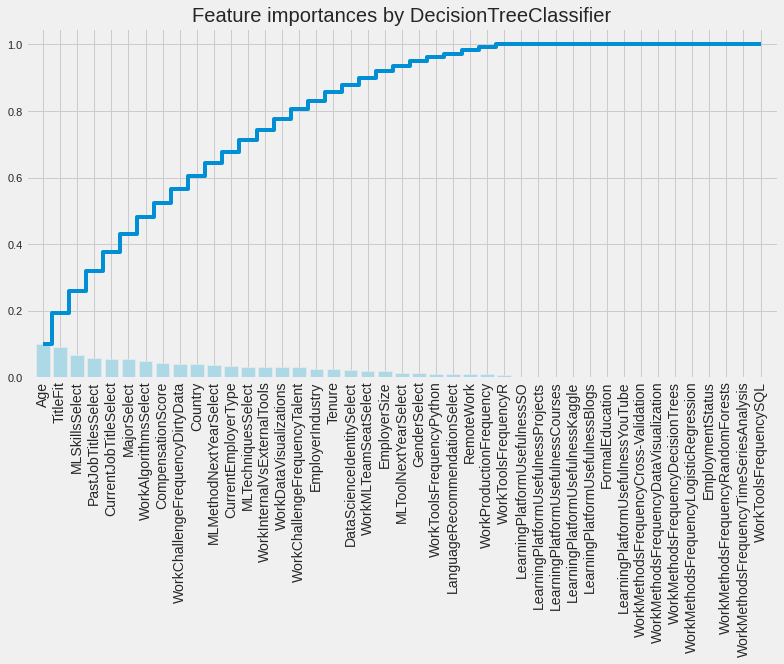

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

df = train
categorical = [var for var in df.columns if df[var].dtype=='O']
for cols in categorical:
  df[cols] = df[cols].astype('category').cat.codes



# Create train and test splits
target_name = 'JobSatisfaction'
X = df.drop('JobSatisfaction', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)


dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['JobSatisfaction'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()